In [8]:
import duckdb

ip = "192.168.4.203"
duckdb.sql("INSTALL postgres;")
duckdb.sql("LOAD postgres;")
duckdb.sql(f"ATTACH 'dbname=postgres user=postgres host={ip} password=template!PWD' AS db (TYPE POSTGRES);")


In [2]:
df = duckdb.query("""
SELECT * FROM db.public.programs
""").df()

df2 = duckdb.query("""
SELECT * FROM db.public.programs
WHERE id = 'fbd9228a-a5a1-4c85-9509-889caad0ac26'
AND team_id = '0e563c05-13e8-42d1-ae3b-4c2eaee36161'
""").df()

df2



,id,team_id,action,pointer


In [3]:
import uuid
random_id = uuid.uuid4()
print(random_id)

duckdb.query(f"""
UPDATE db.public.programs
SET action = NULL,
    pointer = '{random_id}'
WHERE id = 'fbd9228a-a5a1-4c85-9509-889caad0ac26'
AND team_id = '0e563c05-13e8-42d1-ae3b-4c2eaee36161'
""")

d8571b82-990d-4ce0-b6f9-f96427b1030f


In [4]:
df = duckdb.query("""
SELECT * FROM db.public.programs
WHERE id = 'fbd9228a-a5a1-4c85-9509-889caad0ac26'
AND team_id = '0e563c05-13e8-42d1-ae3b-4c2eaee36161'
""").df()

df

,id,team_id,action,pointer


In [5]:
df = duckdb.query("""
SELECT * FROM db.public.teams
""").df()

df

,id,lucky_breaks
0,cc60b460-02ae-4160-a6dd-a303b1725948,0
1,604c4a6e-104e-4396-b025-9b993928499d,0
2,15bce166-82bb-4732-be99-e4a87fd0a7ae,0
3,7de23ae5-fca7-4c59-900c-7ee7457f384f,0
4,9b43623a-9038-45c9-a074-3a00cb468f36,0
...,...,...
314,d23095eb-fdfe-41a1-bf9f-5d93b9312412,0
315,e74912be-4feb-4840-867b-2ce74c242655,0
316,9660c70b-5e69-4b35-b3d5-66b6ee65007a,0
317,3034636d-6114-482a-a57d-1fe34fb18510,0


In [57]:
df = duckdb.query("""
SELECT * FROM db.public.teams
""").df()

df

,id,lucky_breaks
0,7814b8d3-668c-412c-b17c-3f77ce64005a,0
1,5658319a-31c9-4a0a-aff0-77c2816c26b0,0
2,903528ad-d179-439b-b745-d0ecc4b8e281,0
3,e4d0536d-eee6-49e0-90a7-fdeb45214476,0
4,3db798bf-e6b8-4522-9758-f20db82933eb,0
...,...,...
325,3dafb3ae-692d-45ff-8ba0-37eb4957b8f2,0
326,4823a55b-2cc5-45ed-bcdd-9bb1b64c26f1,0
327,19b94eee-a975-4d71-8b22-cc22ebc49316,0
328,344f7dbe-3e8d-44e1-ab82-dc2b95edc782,0


In [7]:
import uuid
random_id = uuid.uuid4()
print(random_id)

duckdb.query(f"""
UPDATE db.public.programs
SET action = NULL,
    pointer = '{random_id}'
WHERE id = 'fbd9228a-a5a1-4c85-9509-889caad0ac26'
AND team_id = '0e563c05-13e8-42d1-ae3b-4c2eaee36161'
""")

d0ae00a7-dafc-4d8e-a8d8-a5a48c3f076d


In [8]:
duckdb.query("""SELECT * FROM db.public.programs""")

┌──────────────────────────────┬──────────────────────────────────────┬─────────┬──────────────────────────────────────┐
│              id              │               team_id                │ action  │               pointer                │
│             uuid             │                 uuid                 │ varchar │                 uuid                 │
├──────────────────────────────┼──────────────────────────────────────┼─────────┼──────────────────────────────────────┤
│ aee2fcd5-47af-4d1d-a73e-4d…  │ 604c4a6e-104e-4396-b025-9b993928499d │ MIDDLE  │ NULL                                 │
│ 9c030f9d-e5ad-4ff7-874f-38…  │ 8a7ba9b6-f7a6-4e84-9402-399266b83759 │ NOTHING │ NULL                                 │
│ 37ba1202-8d2a-4fd6-a483-9a…  │ 8a7ba9b6-f7a6-4e84-9402-399266b83759 │ NOTHING │ NULL                                 │
│ c4fb8ab4-35ac-442c-8e29-d0…  │ ce72fb22-107e-435a-a999-5efc5f170537 │ MIDDLE  │ NULL                                 │
│ ccd8c660-88fe-4f2a-92f7-cf…  │

In [9]:
duckdb.query("""
WITH team_cumulative_rewards_by_generation AS
(
    SELECT generation, team_id, SUM(reward) AS cumulative_reward FROM db.public.training
    GROUP BY generation, team_id
    ORDER BY generation, cumulative_reward DESC
)

SELECT * FROM team_cumulative_rewards_by_generation
JOIN db.public.teams ON team_cumulative_rewards_by_generation.team_id = teams.id
ORDER BY generation, cumulative_reward
""")


┌────────────┬─────────────────────────────┬─────────────────────┬──────────────────────────────────────┬──────────────┐
│ generation │           team_id           │  cumulative_reward  │                  id                  │ lucky_breaks │
│   int32    │            uuid             │       double        │                 uuid                 │    int32     │
├────────────┼─────────────────────────────┼─────────────────────┼──────────────────────────────────────┼──────────────┤
│          1 │ ed583a83-9db3-448d-8bec-a…  │  -774.4891592624792 │ ed583a83-9db3-448d-8bec-ab41af57c864 │            0 │
│          1 │ b4f53b32-9d31-4945-a023-d…  │ -124.33987567008475 │ b4f53b32-9d31-4945-a023-df6ab25e8df6 │            0 │
│          1 │ 59a67837-502d-46e0-a094-6…  │  -114.6859938062717 │ 59a67837-502d-46e0-a094-6db6e160f716 │            1 │
│          1 │ b4f07a76-c687-4e94-9348-3…  │ -29.881444247277443 │ b4f07a76-c687-4e94-9348-3331941adce5 │            0 │
│          2 │ ed583a83-9db3-448

In [44]:
duckdb.query("""SELECT * FROM db.public.teams ORDER BY lucky_breaks DESC""")

┌──────────────────────────────────────┬──────────────┐
│                  id                  │ lucky_breaks │
│                 uuid                 │    int32     │
├──────────────────────────────────────┼──────────────┤
│ 6aedfd13-c95d-4a98-aef0-8352f744606a │            5 │
│ 700947ed-c6c0-4032-9e69-0aad27b92cb9 │            1 │
│ 4f94f9ce-4716-491c-b3fc-3747a8997474 │            1 │
│ 63dd38d7-df25-4432-8514-65b3d52f7d76 │            1 │
│ e28f19e4-d756-4e83-ba8d-3e275e35f439 │            1 │
│ c017c83f-4f46-4b30-a6e5-fcf8fe6b580a │            1 │
│ 0fcbde2f-49c4-47fa-b058-823d8570f851 │            1 │
│ d36fae6f-2e66-459d-86ff-4e107e52c57b │            1 │
│ 9dbd8944-6707-40cd-8503-e7c8514b0046 │            1 │
│ 67ce86fc-51b7-40df-9c05-8d70cd120916 │            1 │
│                  ·                   │            · │
│                  ·                   │            · │
│                  ·                   │            · │
│ 0af16209-c67b-4b3d-9775-35add066d8b1 │        

In [11]:
duckdb.query("""
SELECT * FROM db.public.observations
ORDER BY id DESC
LIMIT 50
""")

┌─────────┬──────────────────────────────────────────────────────────────────────────────────────────────────┐
│   id    │                                           observation                                            │
│  int32  │                                             double[]                                             │
├─────────┼──────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 6947427 │ [-0.16945867, -0.042782728, -0.059925307, 1.9099238e-05, -0.0007106834, -9.123127e-05, 1.0, 1.0] │
│ 6947426 │ [-0.17944431, -0.039256264, -0.3696621, -1.1790302, 0.11567629, -6.25774, 1.0, 1.0]              │
│ 6947425 │ [-0.17944431, -0.039256264, -0.3696621, -1.1790302, 0.11567629, -6.25774, 1.0, 1.0]              │
│ 6947424 │ [-0.16650733, -0.0027695321, -0.3032769, -1.8713328, -0.029828837, -0.029140508, 1.0, 0.0]       │
│ 6947423 │ [-0.17515096, -0.0006115699, -0.3701257, -1.8701872, 0.1868305, 0.23889403, 0.0, 1.0]            │
│

In [38]:
import pandas as pd
import numpy as np
import duckdb



# Sample profile creation
sample_profile = [0 if i % 2 == 0 else 1 for i in range(50)]

# Query to get diversity profiles
profiles = duckdb.query("""
SELECT * FROM db.public.diversity_cache
ORDER BY id DESC
LIMIT 50
""").df()['profile']

result = []

# Process each profile
for profile in profiles:
    # Convert numpy arrays to Python lists if needed
    if isinstance(profile, np.ndarray):
        profile = profile.tolist()
    
    print(f"Profile: {profile}")
    result.append(profile)

# Convert sample_profile to numpy array for comparison
sample_profile_array = np.array(sample_profile)

# Check if sample_profile is in result
found = any(np.array_equal(sample_profile_array, np.array(profile)) for profile in result)

if found:
    print("Already in diversity profiles... Mutating again")
else:
    print("Not in diversity profiles")


Profile: [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 1, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 1, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3]
Profile: [1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 1, 2, 1, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3]
Profile: [1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 1, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3]
Profile: [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Profile: [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 1, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2]
Profile: [1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 1, 3, 1, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3]
Profile: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [87]:
import pandas as pd
import numpy as np
import duckdb



# Sample profile creation
sample_profile = [0 if i % 2 == 0 else 1 for i in range(50)]

# Query to get diversity profiles
profiles = duckdb.query("""
SELECT * FROM db.public.diversity_cache
ORDER BY id DESC
LIMIT 50
""").df()['profile']

result = []

# Process each profile
for profile in profiles:
    # Convert numpy arrays to Python lists if needed
    if isinstance(profile, np.ndarray):
        profile = profile.tolist()
    
    print(f"Profile: {profile}")
    result.append(profile)

# Convert sample_profile to numpy array for comparison
sample_profile_array = np.array(sample_profile)

# Check if sample_profile is in result
found = any(np.array_equal(sample_profile_array, np.array(profile)) for profile in result)

if found:
    print("Already in diversity profiles... Mutating again")
else:
    print("Not in diversity profiles")


Profile: [1, 2, 2, 2, 3, 1, 2, 1, 2, 1, 3, 2, 1, 2, 2, 1, 2, 2, 1, 3, 2, 1, 1, 1, 2, 1, 3, 2, 1, 1, 3, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 3, 2, 2, 1, 2, 2, 3, 3, 2]
Profile: [3, 2, 2, 2, 0, 3, 2, 3, 2, 3, 2, 2, 3, 2, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 2, 0, 2, 2, 3, 2, 0, 2, 3, 0, 2, 2, 2, 0]
Profile: [1, 2, 3, 2, 2, 1, 2, 1, 3, 1, 3, 2, 1, 2, 2, 1, 2, 2, 1, 3, 3, 1, 1, 1, 2, 1, 2, 2, 1, 1, 3, 2, 1, 1, 3, 1, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 2, 2, 3, 3]
Profile: [1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 3, 1, 1, 1, 2, 1, 2, 2, 1, 1, 3, 2, 1, 1, 2, 1, 2, 3, 3, 3, 1, 3, 2, 3, 1, 3, 2, 3, 3, 2]
Profile: [1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 3, 2, 1, 2, 2, 1, 3, 2, 1, 3, 3, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 1, 3, 3, 3, 2, 3]
Profile: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Profile: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [14]:
profiles = duckdb.query("""
SELECT * FROM db.public.diversity_cache
WHERE team_id = '419ab451-2e92-4b8f-8d82-9608c8512917'
ORDER BY id DESC
LIMIT 360

""").df()

profiles

,id,team_id,profile


In [67]:
pd.set_option('display.max_colwidth', None)

duckdb.query("""
SELECT * FROM db.public.diversity_cache
""").df()

,id,team_id,profile
0,1,6ab06a97-d692-41af-80f9-e2a6422cbe04,"[0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]"
1,2,ce0a78a1-2208-4217-83cd-684fc4b22a93,"[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,3,d6e42f1c-a2c4-40ee-a992-36cd8d59a05f,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]"
3,4,ab25a848-dc07-46ca-ae0a-e83203804c89,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]"
4,5,88de08a0-5c52-4f6d-9e2f-6cfb99b054c3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]"
...,...,...,...
8679,8680,17d0a685-ee20-479b-b269-0a8a26616b3c,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
8680,8681,d112a9ad-df97-4e56-b19f-d3b81191ff31,"[3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2]"
8681,8682,aa4d4b94-1a07-4aef-9dc3-b2e14a560512,"[3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2]"
8682,8683,8435651a-0a5a-4235-aad1-9f185f2ced2b,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]"


In [93]:
duckdb.query("""
SELECT generation, team_id, lucky_breaks FROM db.public.training
JOIN db.public.teams ON training.team_id = teams.id
WHERE generation = 101
GROUP BY generation, team_id, lucky_breaks
ORDER BY generation DESC, lucky_breaks DESC
""")

┌────────────┬──────────────────────────────────────┬──────────────┐
│ generation │               team_id                │ lucky_breaks │
│   int32    │                 uuid                 │    int32     │
├────────────┼──────────────────────────────────────┼──────────────┤
│        101 │ 1fc5d8d8-20d4-4384-b555-81e0244533e3 │            1 │
│        101 │ 224ef840-60b8-4448-8fa9-ccb4a827ee21 │            1 │
│        101 │ e31bd408-75c5-4f46-a721-3f8f2aea848b │            1 │
│        101 │ f392b8ed-bd3b-4f27-b9b9-7d0af6754cf2 │            1 │
│        101 │ 21fa1fb0-8b0d-4eab-946e-c81dd96195f1 │            1 │
│        101 │ 7e706762-a675-493c-9e18-d6f0896031a5 │            1 │
│        101 │ d1178fab-5246-4eb8-a9d9-1f4445a7016c │            1 │
│        101 │ 960a5d1e-9f9a-442a-b69a-b641aca4ddf1 │            1 │
│        101 │ 99b3927f-d644-488e-a120-a8ad6f3869e1 │            1 │
│        101 │ 992ebf0c-8495-4ce9-8bd6-d347caf14538 │            1 │
│         ·  │                  · 

In [17]:
import duckdb

duckdb.query("""
SELECT
    o1.id AS id1,
    o1.observation AS observation1,
    o2.id AS id2,
    o2.observation AS observation2
FROM
    db.public.observations o1
JOIN
    db.public.observations o2
ON o1.observation = O2.observation
WHERE o2.id <> o1.id
ORDER BY id1
LIMIT 10
""")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌─────────┬──────────────────────┬─────────┬───────────────────────────────────────────────────────────────────────────┐
│   id1   │     observation1     │   id2   │                               observation2                                │
│  int32  │       double[]       │  int32  │                                 double[]                                  │
├─────────┼──────────────────────┼─────────┼───────────────────────────────────────────────────────────────────────────┤
│ 1872363 │ [-0.013057232, 1.4…  │ 1937696 │ [-0.013057232, 1.4146765, -0.6531803, 0.0707995, 0.012665336, 0.1007730…  │
│ 1872363 │ [-0.013057232, 1.4…  │ 1937732 │ [-0.013057232, 1.4146765, -0.6531803, 0.0707995, 0.012665336, 0.1007730…  │
│ 1872363 │ [-0.013057232, 1.4…  │ 1937831 │ [-0.013057232, 1.4146765, -0.6531803, 0.0707995, 0.012665336, 0.1007730…  │
│ 1872363 │ [-0.013057232, 1.4…  │ 1937886 │ [-0.013057232, 1.4146765, -0.6531803, 0.0707995, 0.012665336, 0.1007730…  │
│ 1872363 │ [-0.013057232, 1.4… 

In [18]:
duckdb.query("""
SELECT MIN(generation) AS created_on_generation, team_id FROM db.public.training
JOIN db.public.teams ON training.team_id = teams.id
GROUP BY team_id
ORDER BY created_on_generation
""")

┌───────────────────────┬──────────────────────────────────────┐
│ created_on_generation │               team_id                │
│         int32         │                 uuid                 │
├───────────────────────┼──────────────────────────────────────┤
│                     1 │ 59a67837-502d-46e0-a094-6db6e160f716 │
│                     1 │ b4f07a76-c687-4e94-9348-3331941adce5 │
│                     1 │ ed583a83-9db3-448d-8bec-ab41af57c864 │
│                     1 │ b4f53b32-9d31-4945-a023-df6ab25e8df6 │
│                     2 │ 6166f312-0564-4a1d-b859-e69a122f2a58 │
│                     3 │ 363d4d72-676c-480d-8c95-b8d1be9cbc88 │
│                     4 │ 15bce166-82bb-4732-be99-e4a87fd0a7ae │
│                     4 │ ce25a5b2-6936-4ff3-b7b6-57f358332eb6 │
│                     4 │ aab4ef2f-0ea5-4756-8044-4d6f49fea439 │
│                     5 │ 3034636d-6114-482a-a57d-1fe34fb18510 │
│                     · │                  ·                   │
│                     · │

In [19]:
duckdb.query("""
SELECT generation, team_id, SUM(reward) AS cumulative_reward FROM db.public.training
GROUP by generation, team_id
ORDER BY cumulative_reward DESC
""")

┌────────────┬──────────────────────────────────────┬─────────────────────┐
│ generation │               team_id                │  cumulative_reward  │
│   int32    │                 uuid                 │       double        │
├────────────┼──────────────────────────────────────┼─────────────────────┤
│          7 │ 06d3b18d-508f-4820-a1df-4780c959d144 │  27.255116472847163 │
│          9 │ a3b39fbc-ac1d-4760-9520-da30c182827e │   25.22304841032205 │
│          9 │ 3de1e132-734a-4b80-af15-98fd6dfac4cd │   21.65100922999943 │
│          9 │ 5734981a-2abf-43b2-ac6c-dd00d81dfd1a │   21.65100922999943 │
│          9 │ 12e5a978-776f-47e0-9c67-df741ceb4323 │  21.221994672175484 │
│          3 │ 07012c8e-2d90-4fdf-afc2-08998f295851 │  20.619057618564938 │
│          3 │ 3871b0cd-3657-469d-a7a1-a7f7de16ad32 │  17.452198993365798 │
│          7 │ b4f07a76-c687-4e94-9348-3331941adce5 │   17.27281605559537 │
│          3 │ 7d6629c6-ade6-470d-8a78-c4e0db1bb41e │  15.211862945937071 │
│          3

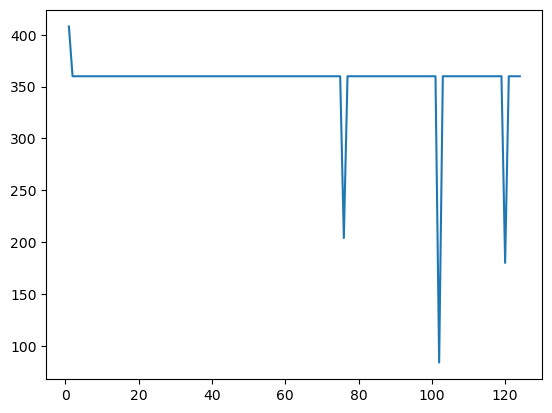

In [82]:
import duckdb
import matplotlib.pyplot as plt

df = duckdb.query("""
SELECT generation, COUNT(DISTINCT(team_id)) AS num_teams FROM db.public.training
GROUP BY generation
ORDER BY generation
""").df()

plt.plot(df['generation'], df['num_teams'])


In [80]:
import duckdb
import matplotlib.pyplot as plt

df = duckdb.query("""
SELECT * FROM db.public.programs
""").df()

#plt.plot(df['generation'], df['num_programs'])